In [2]:
import pandas as pd
df = pd.read_csv("tvmarketing.csv")
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [3]:
import numpy as np
X =np.array(df['TV'])
y = np.array(df['Sales'])
X.shape

(200,)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
print(len(X_test))

40


In [16]:

def predict(data,w,b):
    prediction =[w*x+b for x in data]
    return prediction


def improve(cost,ya,X_train,w,b,m):
    lr=0.001
    for i in range(1000):
        #decrease value of w and b if cost is negative else increase both
        
        w += lr*cost
        b += lr*cost
        prediction =predict(X_train,w,b)
        cost  = calculate_cost(ya,prediction)

        
        
    return (cost,w,b)
    
def calculate_cost(ya,yp):
    # print("here",ya,yp)
    # print((ya-yp))
    error = [(ya[i]-yp[i]) for i in range(len(ya))]
    cost = sum(error)/len(ya)

    return cost
def fit_model(X_train,y_train,w,b):
    
    prediction = predict(X_train,w,b)
    cost  = calculate_cost(y_train,prediction)
    # print(cost)
    m=X_train.mean()
    cost,w,b = improve(cost,y_train,X_train,w,b,m)
    # print("training",cost)
    prediction =predict(X_test,w,b)
    # cost  = calculate_cost(y_test,prediction)
    # print(prediction)
    # print(cost,w,b)
    return prediction,w,b,cost



prediction,w,b,cost = fit_model(X_train,y_train,0.1,5)
print(b)
print(w)
# print(y_train)

    


4.9609193356812655
0.06091933568126609


In [17]:
print(cost)
print(prediction)
print(y_test.reshape(1,-1))

-3.3861802251067274e-15
[14.90904685243202, 16.86455752780066, 22.804192756724103, 5.673675563152079, 18.381448986264186, 9.535961445344348, 18.168231311379756, 8.00688611974457, 18.509379591194843, 15.627895013470958, 6.879878409641147, 8.38458600096842, 19.246503552938165, 5.2898837483601024, 13.459166663217886, 15.329390268632753, 5.405630486154508, 16.998580066299443, 9.548145312480603, 19.423169626413834, 18.941906874531835, 9.091250294871106, 7.275854091569377, 20.245580658110928, 9.164353497688627, 8.220103794629, 17.967197503631574, 13.446982796081631, 10.273085407087668, 5.472641755403901, 17.13260260479823, 9.17653736482488, 17.077775202685093, 5.990456108694662, 22.060976861412655, 19.47190509495885, 7.903323249086418, 21.634541511643793, 12.100665477525652, 6.636201066916083]
[[16.9 22.4 21.4  7.3 24.7 12.6 22.3  8.4 11.5 14.9  9.5  8.7 11.9  5.3
  10.3 11.7  5.5 16.6 11.3 18.9 19.7 12.5 10.9 22.2  9.3  8.1 21.7 13.4
  10.6  5.7 10.6 11.3 23.7  8.7 16.1 20.7 11.6 20.8 11.9 

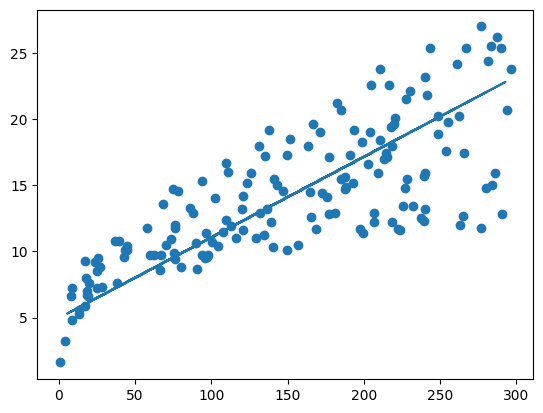

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train)
plt.plot(X_test,prediction)